# Milestone 2

Name : `Kamil Riyadi Alam Situmeang`

Batch : `FTDS009`

URL Backend : https://kamil-riyadi-ftds-009-p1m2.herokuapp.com/\
URL Frontend: https://kamil-burnrate-p1m2.herokuapp.com/

## I. Introduction

This project is meant for fulfilling `Hacktiv8 Fulltime Datascience Bootcamp Milestone 2 assignment.`

In this project, I will try to create end-to-end `Machine Learning` prediction model using several `Supervised Learning` algorithm that is available in `Sklearn` library.

### I.1 Dataset Description


**About this dataset:**

Globally, `World Mental Health Day is celebrated on October 10` each year. The objective of this day is `to raise awareness about mental health issues around the world` and mobilize efforts in support of mental health. According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide. `These days when the world is suffering from a pandemic situation, it becomes really hard to maintain mental fitness.`

------------------------------------------------------------------------------------------------------------------------------------------

**Attribute Information**

| Feature Name         | Description                                                                                                                                       |
| -------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| Employee ID          | The unique ID allocated for each employee (example: fffe390032003000)                                                                             |
| Date of Joining      | The date-time when the employee has joined the organization (example: 2008-12-30)                                                                 |
| Gender               | The gender of the employee (Male/Female)                                                                                                          |
| Company Type         | The type of company where the employee is working (Service/Product)                                                                               |
| WFH Setup Available  | Is the work from home facility available for the employee (Yes/No)                                                                                |
| Designation          | The designation of the employee of work in the organization; In the range of \[0.0, 5.0\] bigger is higher designation.                           |
| Resource Allocation  | The amount of resource allocated to the employee to work, ie. number of working hours; In the range of \[1.0, 10.0\] (higher means more resource) |
| Mental Fatigue Score | The level of fatigue mentally the employee is facing; In the range of \[0.0, 10.0\] where 0.0 means no fatigue and 10.0 means completely fatigue. |

------------------------------------------------------------------------------------------------------------------------------------------

| Target Name | Description                                                                                                                                                                |
| ----------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Burn Rate   | The value we need to predict for each employee telling the rate of Bur out while working; In the range of \[0.0, 1.0\] where the higher the value is more is the burn out. |

------------------------------------------------------------------------------------------------------------------------------------------

**Acknowledgements:**

A special thanks to the HackerEarth Competition on the topic "HackerEarth Machine Learning Challenge: Are your employees burning out? which can be accessed [here](https://www.kaggle.com/datasets/blurredmachine/hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-burnout-rate/) for this data collection.

**License**

[Open Data Commons Attribution License (ODC-By) v1.0](https://opendatacommons.org/licenses/by/1-0/index.html)

### I.2 Objectives

Create a machine learning model that can estimate the `Burn Rate` of an employee based on the given features.

### I.3 Dataset Limitation

There are several limitations in the dataset that may affect the performance of the model. Those limitation are:
- The dataset only records employee that is joining from the year 2008.
- The dataset only records generalize `Company Type` of service and product companies.

### I.4 Assumptions for The Project

For this project, I made the following assumptions:
- The prediction model will not be employee-time bound.

## II. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Data Preprocessing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import OutlierTrimmer, Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Selection and Tuning
from sklearn.model_selection import cross_val_score, GridSearchCV

# Metric
from sklearn.metrics import mean_absolute_error, r2_score

# Deployment
import pickle

import warnings
warnings.filterwarnings("ignore")

## III. Data Loading


In [2]:
# Load Data and save it in `df_og` variable
df_train_test = pd.read_csv('train.csv')

# Make copy from the df
df = df_train_test.copy()

### Dataset Preview

In [3]:
# Show the dataset
pd.set_option('display.max_columns', None)
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [4]:
# Dataset Shape
df.shape

(22750, 9)

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [6]:
# Null value summary
df.isnull().sum().sort_values()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Burn Rate               1124
Resource Allocation     1381
Mental Fatigue Score    2117
dtype: int64

In [7]:
# Dataset Check
df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
Designation,22750.0,2.178725,1.135145,0.0,2.00,5.0
Resource Allocation,21369.0,4.481398,2.047211,1.0,4.00,10.0
Mental Fatigue Score,20633.0,5.728188,1.920839,0.0,5.90,10.0
Burn Rate,21626.0,0.452005,0.198226,0.0,0.45,1.0


In [8]:
# Dataset Check
df.describe(include=object).T

,count,unique,top,freq
Employee ID,22750,22750,fffe32003000360033003200,1
Date of Joining,22750,366,2008-01-06,86
Gender,22750,2,Female,11908
Company Type,22750,2,Service,14833
WFH Setup Available,22750,2,Yes,12290


Insight from `Dataset Preview` process:

Based on above process, I get these information:

- The dataset consist of `22750 rows` of entries and `9 columns.`
- There are `5 features` that is `object type` and `4 features` that is `float type`
- There are apparent missing values in `Burn Rate, Resource Allocation, Mental Fatigue Score` column. I'll check it later in the process.
- There is no strange values in `numerical` features/columns.
- There also no strange values in `categorical` features/columns.

## IV. Exploratory Data Analysis

### Preliminary Check

Before going deep into the dataset, Let's generaly check the dataset.

In [9]:
# Duplicate entry check
df.duplicated().sum()

0

Looks like our dataset is free from `duplicate values.`
Now let's get deeper with each variable.

In [10]:
# Preliminary Check
# Feature : Employee ID
# Description : The unique ID allocated for each employee 

var = 'Employee ID'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: Employee ID
null value count:  0
Unique Value Count: 22750

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64


I don't really need `Employee ID` for this project, because it has unique values in all its entries and `Burn Rate` has nothing to do with `Employee ID`. So, I'll just drop it.

In [11]:
# Drop Employee ID column
df.drop(columns=['Employee ID'], inplace=True)

In [12]:
# Preliminary Check
# Feature : Date of Joining 
# Description : The date-time when the employee has joined the organization (example: 2008-12-30)

var = 'Date of Joining'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].describe())

variable: Date of Joining
null value count:  0
Unique Value Count: 366

count          22750
unique           366
top       2008-01-06
freq              86
Name: Date of Joining, dtype: object


Looks like there is no strange values in `Date of Joining` column. I decide to rename it to `Date_of_Joining` and convert it as datetime format.

In [13]:
# Rename the column
df.rename(columns={'Date of Joining': 'Date_of_Joining'}, inplace=True)

# Convert to datetime format
df['Date_of_Joining'] = pd.to_datetime(df['Date_of_Joining'])

Let's continue the preliminary check

In [14]:
# Preliminary Check
# Feature : Gender	 
# Description : The gender of the employee (Male/Female)

var = 'Gender'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: Gender
null value count:  0
Unique Value Count: 2

Female    11908
Male      10842
Name: Gender, dtype: int64


I think the input values for this feature already match the expected values.

In [15]:
# Preliminary Check
# Feature : Company Type 
# Description : The type of company where the employee is working (Service/Product)

var = 'Company Type'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: Company Type
null value count:  0
Unique Value Count: 2

Service    14833
Product     7917
Name: Company Type, dtype: int64


I think the input values for this feature already match the expected values. I'll just rename the feature name to `Company_Type`.

In [16]:
# Rename the column
df.rename(columns={'Company Type': 'Company_Type'}, inplace=True)

In [17]:
# Preliminary Check
# Feature : WFH Setup Available 
# Description : Is the work from home facility available for the employee (Yes/No)  

var = 'WFH Setup Available'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print(df[var].value_counts())

variable: WFH Setup Available
null value count:  0
Unique Value Count: 2

Yes    12290
No     10460
Name: WFH Setup Available, dtype: int64


I think the input values for this feature already match the expected values. I'll just rename the feature name to `WFH_Setup_Available`.

In [18]:
# Rename the column
df.rename(columns={'WFH Setup Available': 'WFH_Setup_Available'}, inplace=True)

In [19]:
# Preliminary Check
# Feature : Designation
# Description : The designation of the employee of work in the organization; In the range of [0.0, 5.0] bigger is higher designation. 

var = 'Designation'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: Designation
null value count:  0
Unique Value Count: 6

Descriptive stats:
count    22750.000000
mean         2.178725
std          1.135145
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Designation, dtype: float64


I think the input values for this feature already match the expected values.

In [20]:
# Preliminary Check
# Feature : Resource Allocation
# Description : The amount of resource allocated to the employee to work, ie. number of working hours; In the range of [1.0, 10.0] (higher means more resource) 

var = 'Resource Allocation'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: Resource Allocation
null value count:  1381
Unique Value Count: 10

Descriptive stats:
count    21369.000000
mean         4.481398
std          2.047211
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         10.000000
Name: Resource Allocation, dtype: float64


Looks like there are 1381 of missing values, I'll handle it in later process, for now I'll just rename the column name to `Resource_Allocation`

In [21]:
# Rename the column
df.rename(columns={'Resource Allocation': 'Resource_Allocation'}, inplace=True)

In [22]:
# Preliminary Check
# Feature : Mental Fatigue Score 
# Description : The level of fatigue mentally the employee is facing; In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue  

var = 'Mental Fatigue Score'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: Mental Fatigue Score
null value count:  2117
Unique Value Count: 101

Descriptive stats:
count    20633.000000
mean         5.728188
std          1.920839
min          0.000000
25%          4.600000
50%          5.900000
75%          7.100000
max         10.000000
Name: Mental Fatigue Score, dtype: float64


Looks like there are 2117 of missing values, I'll handle it in later process, for now I'll just rename the column name to `Mental_Fatigue_Score`

In [23]:
# Rename the column
df.rename(columns={'Mental Fatigue Score': 'Mental_Fatigue_Score'}, inplace=True)

In [24]:
# Preliminary Check
# Feature : Burn Rate 
# Description : The value we need to predict for each employee telling the rate of Bur out while working; In the range of [0.0, 1.0] where the higher the value is more is the burn out.

var = 'Burn Rate'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print('Unique Value Count:', df[var].nunique())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: Burn Rate
null value count:  1124
Unique Value Count: 101

Descriptive stats:
count    21626.000000
mean         0.452005
std          0.198226
min          0.000000
25%          0.310000
50%          0.450000
75%          0.590000
max          1.000000
Name: Burn Rate, dtype: float64


Looks like there are 1124 of missing values, I'll handle it in later process, for now I'll just rename the column name to `Burn_Rate`

In [25]:
# Rename the column
df.rename(columns={'Burn Rate': 'Burn_Rate'}, inplace=True)

### Univaraite Analysis

In this part of sub-process, I'll try to plot the histogram of numerical features and see the distribution of each feature.

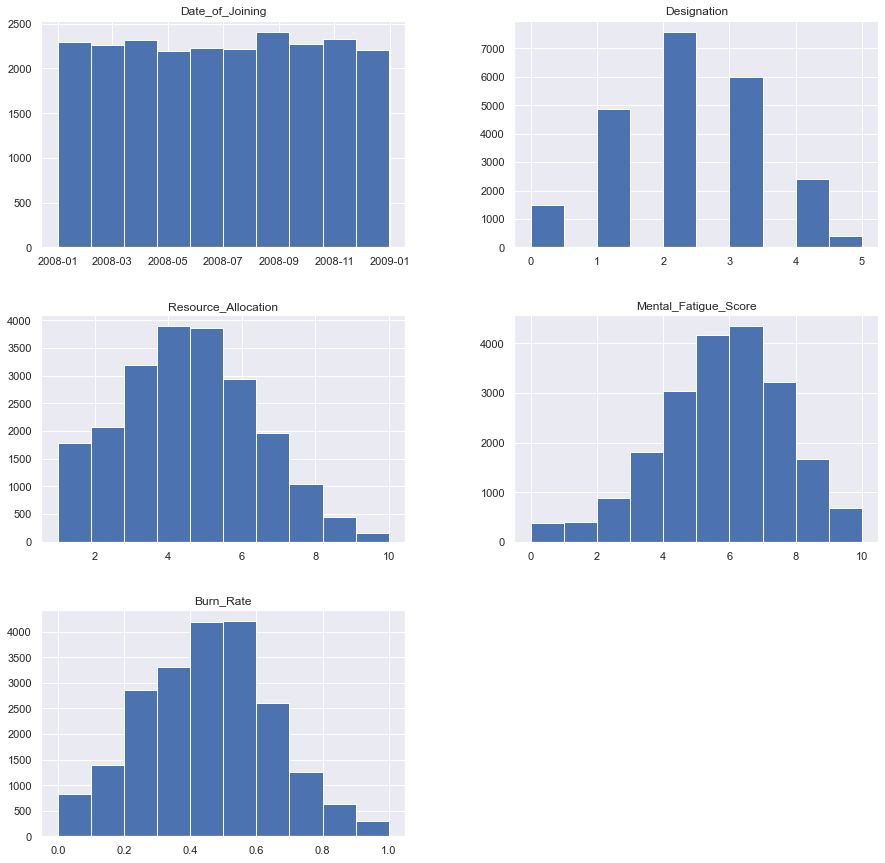

In [26]:
# Histogram Plot
df.hist()
plt.gcf().set_size_inches(15, 15)
plt.show()

From the graph above, We can see that:
- `Designation and Burn Rate` follow `normal distribution.`
- `Resource Allocation and Mental Fatigue Score` follow slight `skew distribution.`

### Bivariate Analysis

In this part of sub-process, I'll try to analyze each individual feature and their correlation with the target.

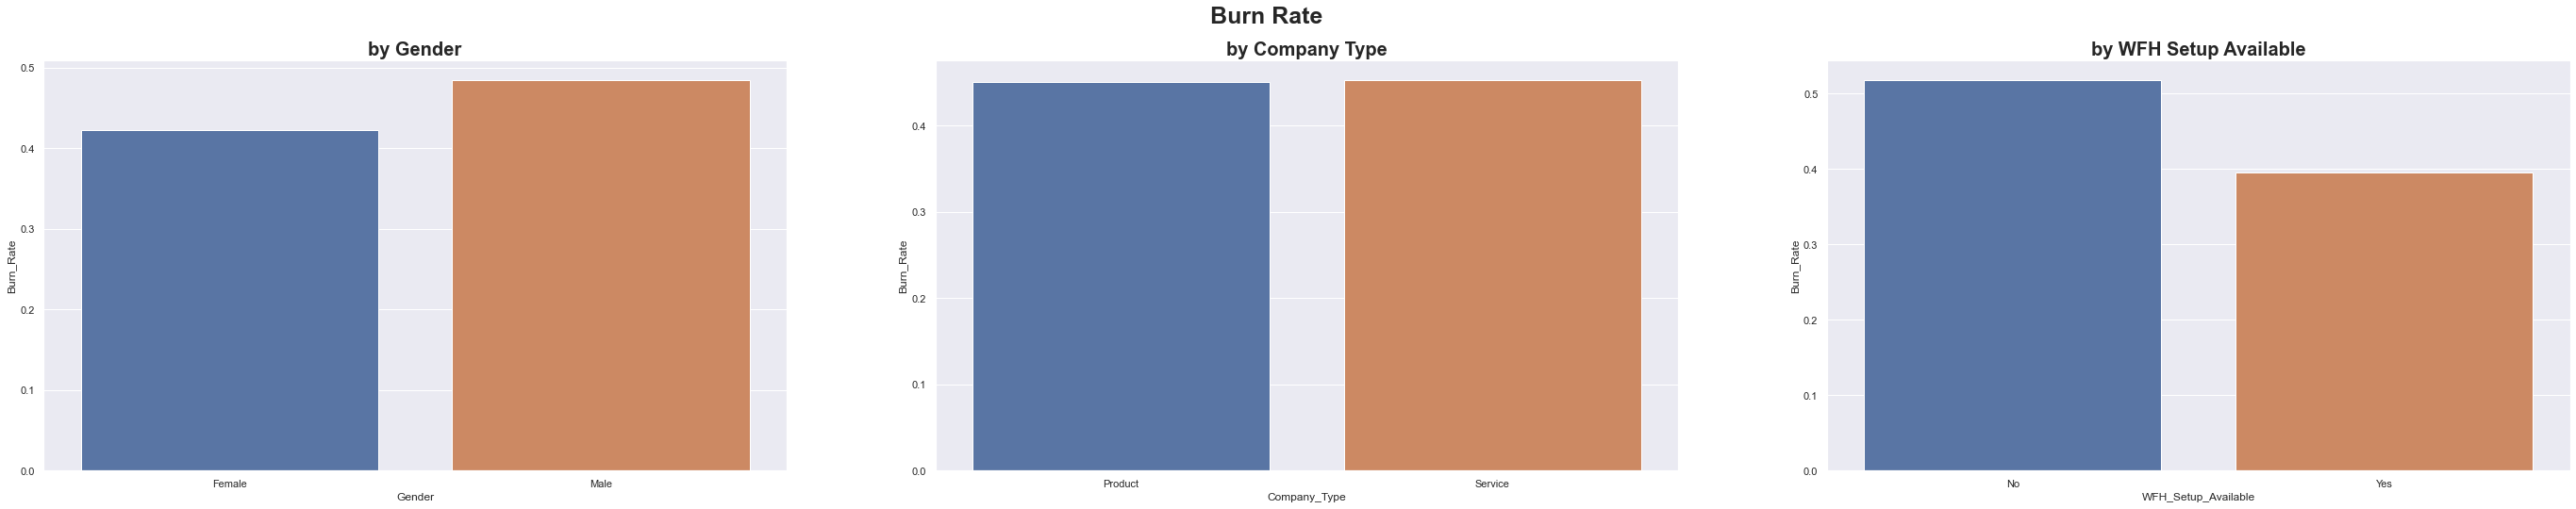

In [27]:
# Categorical Bivariate Analysis
fig, ax = plt.subplots(1,3, figsize=(24 * 2, 8))
fig.suptitle('Burn Rate', fontsize=25, weight='bold')

graph1 = pd.DataFrame(df.groupby('Gender')['Burn_Rate'].mean()).reset_index()
sns.barplot(data=graph1, x='Gender', y='Burn_Rate', ax=ax[0])
ax[0].set_title('by Gender', weight='bold', fontsize=20)

graph2 = pd.DataFrame(df.groupby('Company_Type')['Burn_Rate'].mean()).reset_index()
sns.barplot(data=graph2, x='Company_Type', y='Burn_Rate', ax=ax[1])
ax[1].set_title('by Company Type', weight='bold', fontsize=20)

graph3 = pd.DataFrame(df.groupby('WFH_Setup_Available')['Burn_Rate'].mean()).reset_index()
sns.barplot(data=graph3, x='WFH_Setup_Available', y='Burn_Rate', ax=ax[2])
ax[2].set_title('by WFH Setup Available', weight='bold', fontsize=20)

plt.show()

**Categorical Bivariate Analysis**

Based from graph above, We can see that:
- `By Gender` : Male tends to has higher `Burn Rate` compared to Female
- `By Company Type` : Both `Product and Service` industry has equal `Burn Rate`
- `By WFH Setup Available` : People that has no option for working from home has higher `Burn Rate` compared to people that has opt to work from home.

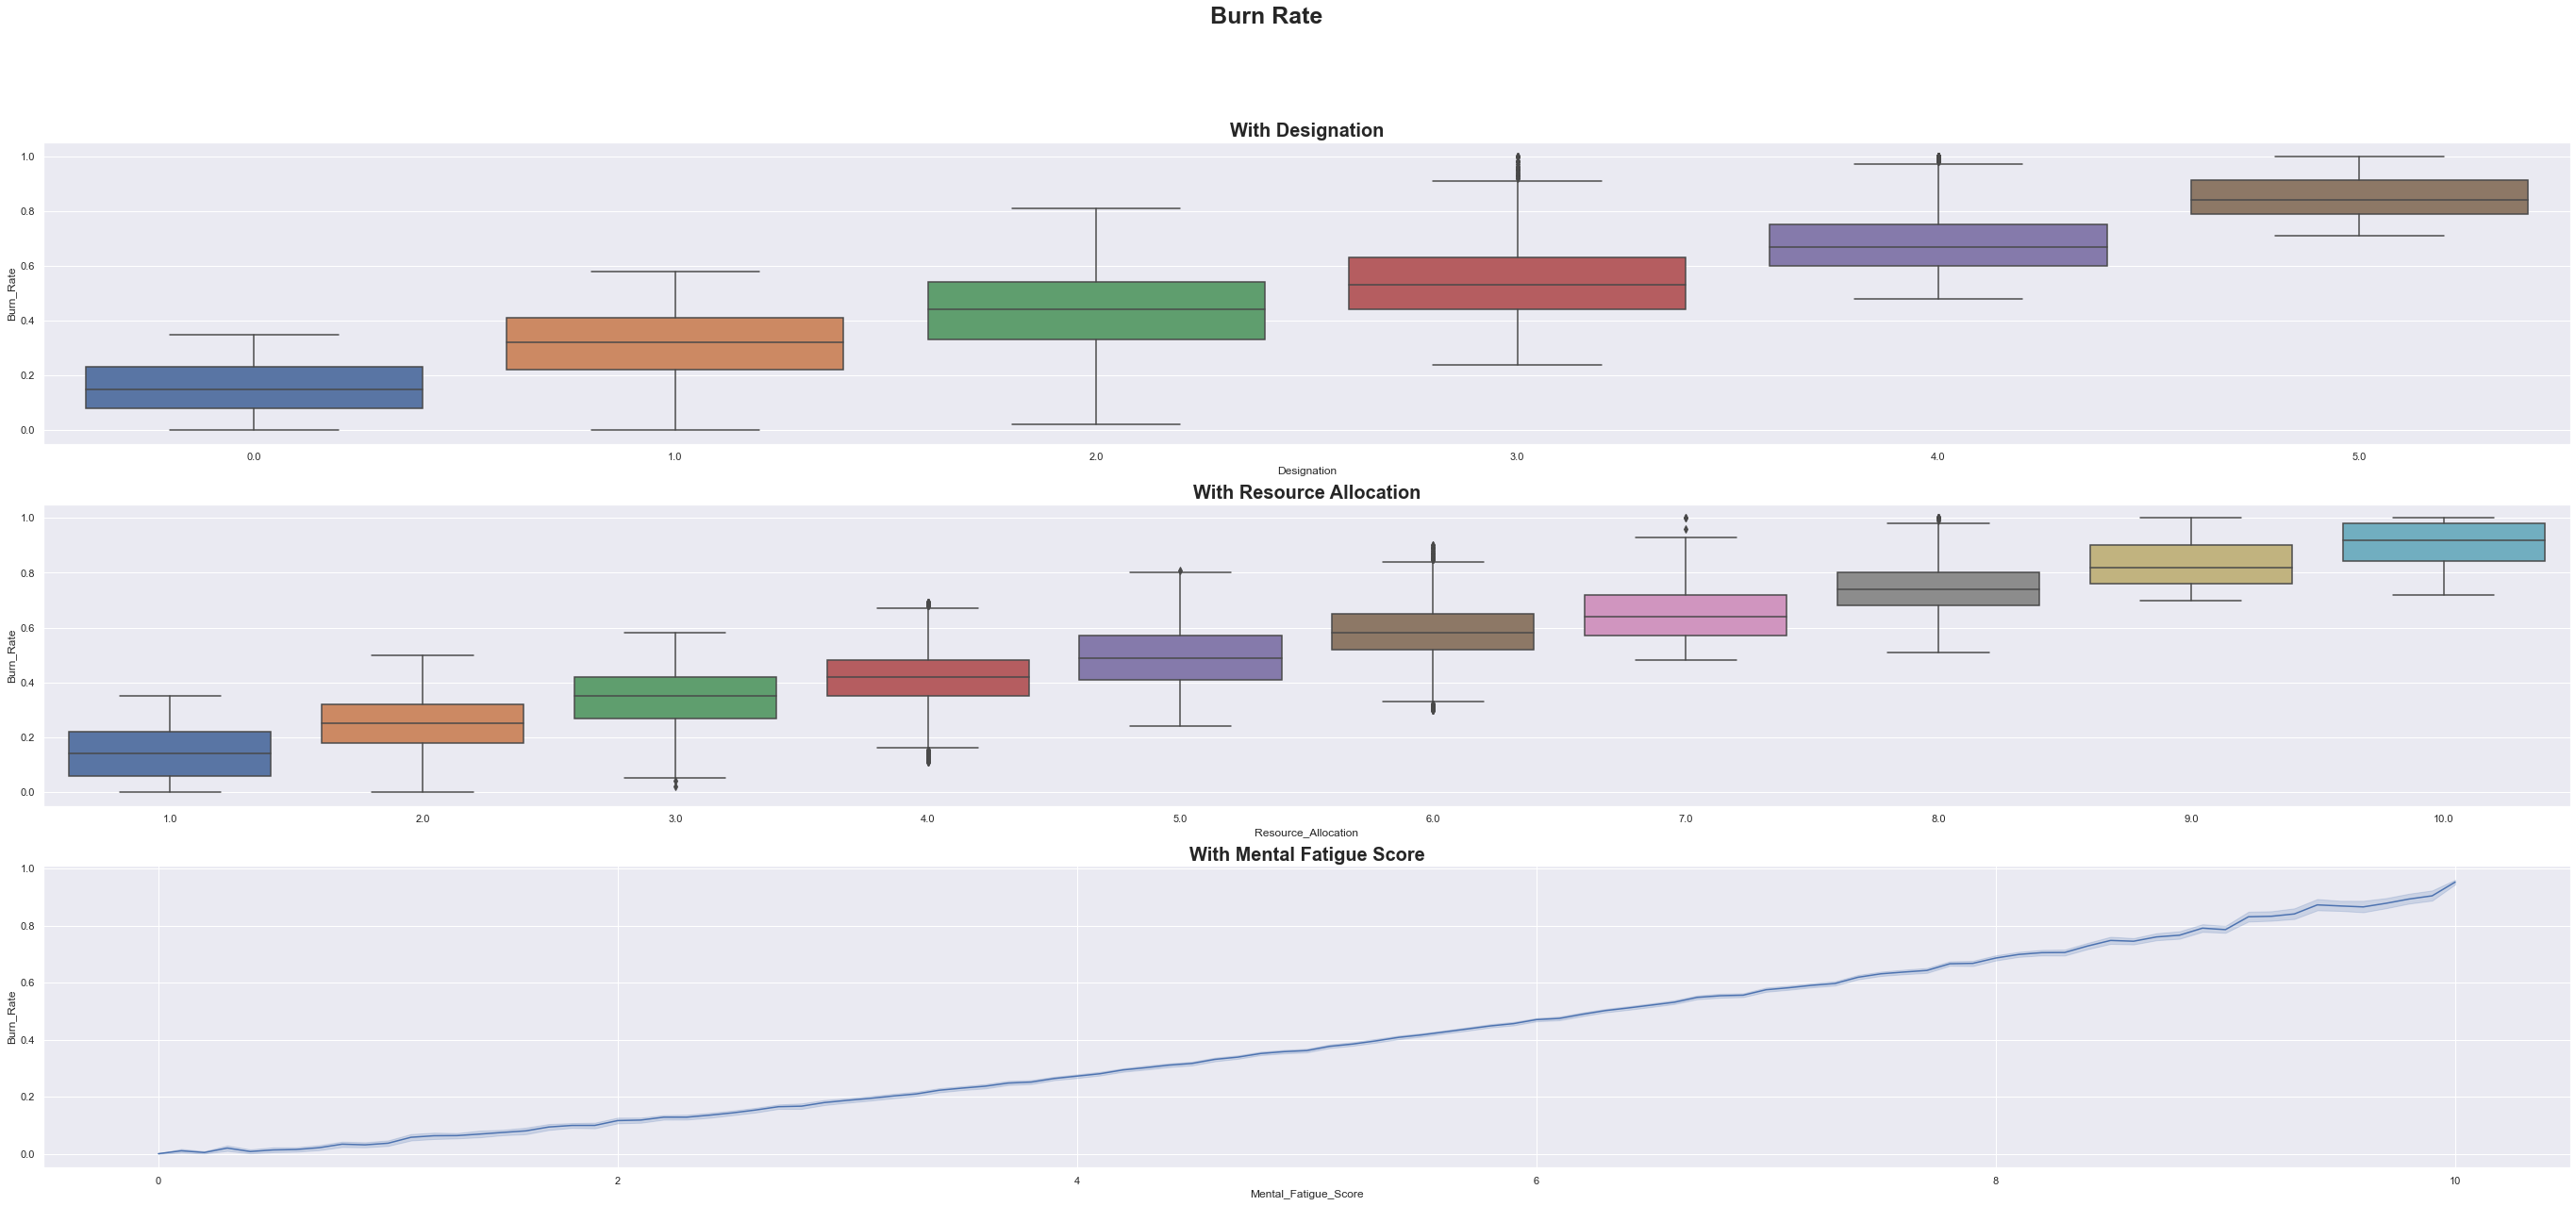

In [28]:
# Numerical Bivariate Analysis
fig, ax = plt.subplots(3,1, figsize=(24 * 2, 20))
fig.suptitle('Burn Rate', fontsize=25, weight='bold')

sns.boxplot(data=df, x='Designation', y='Burn_Rate', ax=ax[0])
ax[0].set_title('With Designation', weight='bold', fontsize=20)

sns.boxplot(data=df, x='Resource_Allocation', y='Burn_Rate', ax=ax[1])
ax[1].set_title('With Resource Allocation', weight='bold', fontsize=20)

sns.lineplot(data=df, x='Mental_Fatigue_Score', y='Burn_Rate', ax=ax[2])
ax[2].set_title('With Mental Fatigue Score', weight='bold', fontsize=20)

plt.show()

**Numerical Bivariate Analysis**

Based from graph above, We can see that:
- `With Designation` : As `Designation` increase, `Burn Rate` also tends to increase.
- `With Resource Allocation` : As `Resource Allocation` increase, `Burn Rate` also tends to increase.
- `Mental Fatigue Designation` : As `Mental Fatigue` increase, `Burn Rate` also tends to increase.

### Multivariate  Analysis

In this part of sub-process, I will try to map the correlation between each features to the target variable. For this task I'll utilize the most common type of correlation coeffiecient which is `Pearson Correlation` and try to plot it in a graph.

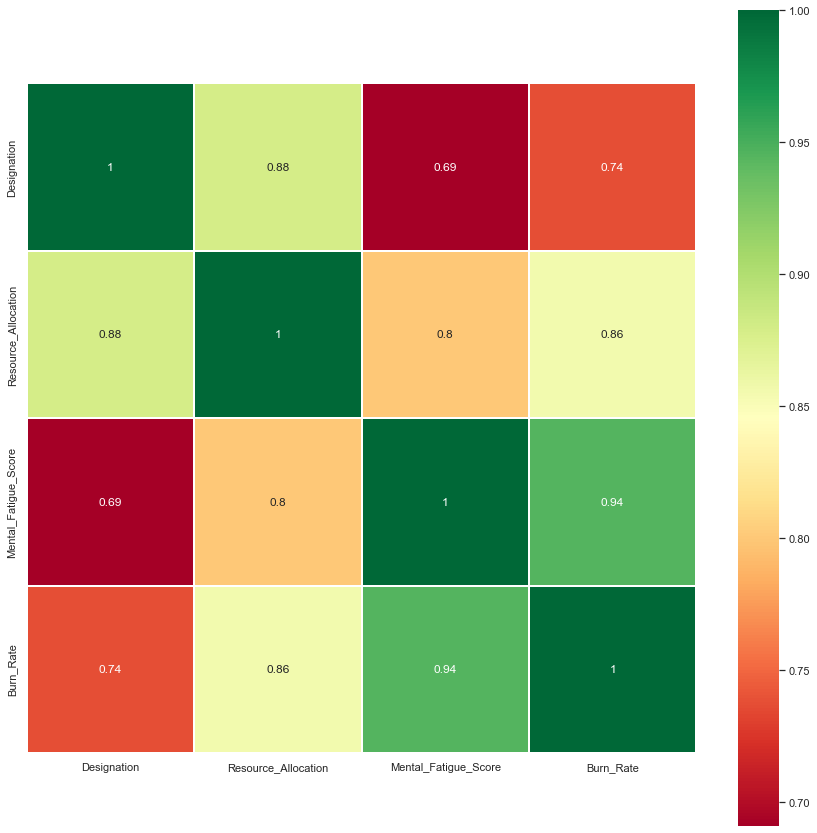

In [29]:
# Checking correlation between each variables

# Heatmap
corrmat = df.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(15,15))

g = sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap='RdYlGn', square=1, linewidths=0.05)

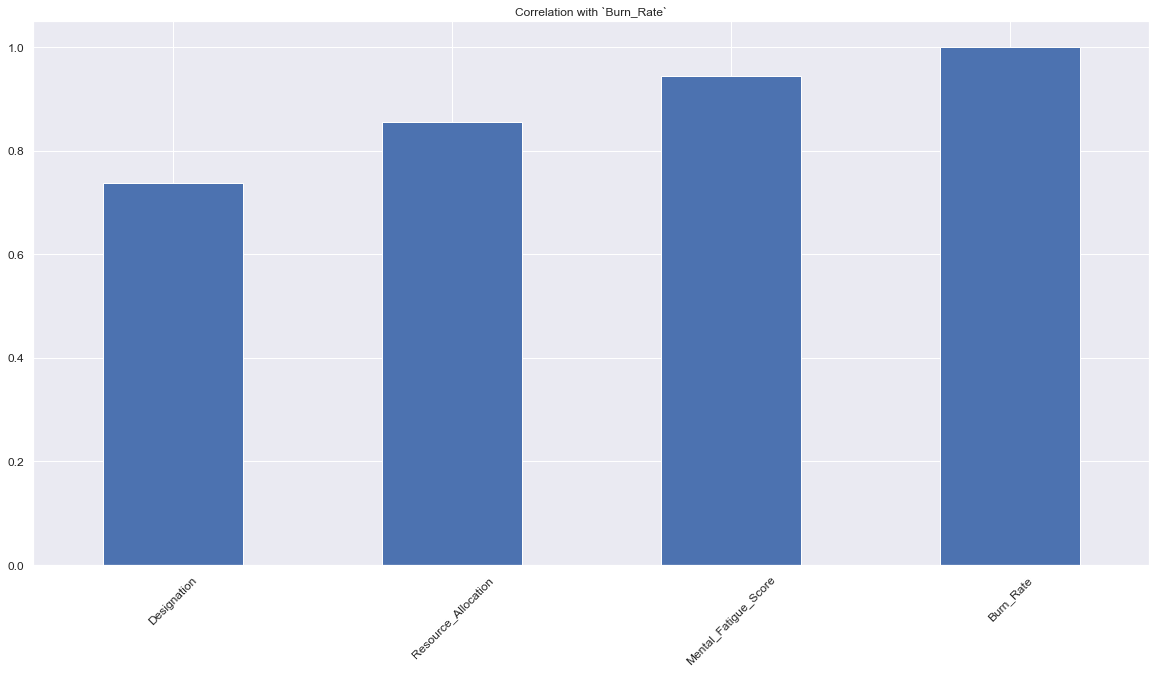

In [30]:
# Checking correlation between features and target

df.corrwith(df['Burn_Rate']).sort_values().plot.bar(figsize=(20,10), title='Correlation with `Burn_Rate`', fontsize=12, rot=45, grid=True)
plt.show()

Based on graph above, I can say that all features has high positive correlation with `Burn_Rate.`

Also from the correaltion above, I can validate the pattern found on `numerical bivaraite analysis` in the previous process.

## V. Data Preprocessing

In this process I  split my dataset into train, test, and inference dataset.

### Dataset Splitting

In this process, I will split my dataset into different set:

1. Use 80% from dataset for `Train Set`
2. Use 20% from dataset for `Test Set`
3. Use `Test.csv` for `Inference Set`

all of those entries will be randomly selected from the dataset.

In [31]:
#Set Random State
random_state = 42

In [32]:
# Inference Set Preparation

inf_set = pd.read_csv('test.csv')
inf_set.shape

(12250, 8)

In [33]:
# Splitting Dataset

# X will be consist of features only
X = df.drop(['Burn_Rate'], axis=1)

# y will be consist of target only
y = df['Burn_Rate']

In [34]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [35]:
# Size Summary

print('Train Set shape : ', X_train.shape)
print('Test Set shape : ', X_test.shape)
print('Inference Set shape : ', inf_set.shape)

Train Set shape :  (15925, 7)
Test Set shape :  (6825, 7)
Inference Set shape :  (12250, 8)


### Outliers Detection

In this sub-process, I will try to identify any outliers inside each `numerical` features. Before do the checking, I'll seperate the features into `numerical` and `categorical` features and then:

- I'll check the distribution of each variable, using skewness value. Any skewness value outside `-0.5 to 0.5` will be considered as `Skewed Distribution`, while any skewness value inside `-0.5 to 0.5` will be considered as `Normal Distribution`.
- I'll count how many outliers there in each variable. For `Normal Distribution`, I'll use `Z-score` to determine the outliers threshold. For `Skewed Distribution`, I'll use `IQR` to determine the outliers threshold.
- Summarize all the information above.

In [36]:
# column categorization
def col_categorization(df):
    global X_train_num, X_train_cat
    X_train_num = df[['Designation', 'Resource_Allocation', 'Mental_Fatigue_Score']]
    X_train_cat = df[['Gender', 'Company_Type', 'WFH_Setup_Available']]
    print("Generate 'X_train_num' and 'X_train_cat'")

# column categorization
col_categorization(X_train)

Generate 'X_train_num' and 'X_train_cat'


In [37]:
# Confirmation Check
X_train_num.head()

,Designation,Resource_Allocation,Mental_Fatigue_Score
6506,2.0,4.0,5.4
12239,3.0,4.0,6.3
12441,2.0,4.0,6.1
8366,2.0,5.0,7.6
16802,3.0,7.0,8.8


In [38]:
# create function to detect outliers based on distribution
def detect_outliers(df, k=1.5):
    #create dataframe with columns name : feature, distribution, outlier
    global df_outliers
    df_outliers = pd.DataFrame(columns=['col_name','distribution','bottom_limit', 'upper_limit', 'left_tail','right_tail','outliers_count','percentage'])
    #create loop for each feature
    for i in range(len(df.columns)):
        #create if statement for each distribution
        if df.iloc[:,i].skew() > -0.5 and df.iloc[:,i].skew() < 0.5 :
            #count outlier for normal distribution based on z-score
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'normal', # distribution,
                                stats.zscore(df.iloc[:,i], nan_policy='omit').min(), # bottom limit
                                stats.zscore(df.iloc[:,i], nan_policy='omit').max(), # upper limit
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))<-3].count(), # left_tail
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # right_tail
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # outliers_count
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count()/len(df.iloc[:,i])*100] # percentage
        else:
            #count outlier for skew distribution based on IQR
            Q1 = df.iloc[:,i].quantile(0.25)
            Q3 = df.iloc[:,i].quantile(0.75)
            IQR = Q3 - Q1
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'skew', # distribution,
                                Q1-k*IQR, # bottom limit
                                Q1+k*IQR, # upper limit
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))].count(), # left_tail
                                df.iloc[:,i][(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # right_tail
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # outliers_count
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count()/len(df.iloc[:,i])*100] # percentage
    print('Generate df_outliers')


In [39]:
# Outliers Summary
detect_outliers(X_train_num)
df_outliers.sort_values(by='percentage',ascending=False)

Generate df_outliers


,col_name,distribution,bottom_limit,upper_limit,left_tail,right_tail,outliers_count,percentage
0,Designation,normal,-1.911687,2.479938,0,0,0,0.0
1,Resource_Allocation,normal,-1.692259,2.694652,0,0,0,0.0
2,Mental_Fatigue_Score,normal,-2.978224,2.220878,0,0,0,0.0


Looks like there is no outliers in the dataset, So let's continue the process.

In [40]:
# #create function to handling outliers
# def handling_outliers(exception_list):
#    global X_train,y_train, norm_under_5, norm_5to15, skew_under_5, skew_5to15
#    exception_list = exception_list

#    norm_under_5 = df_outliers[df_outliers['distribution']=='normal'][df_outliers['percentage']<5]['col_name'].tolist()
#    norm_5to15 = df_outliers[df_outliers['distribution']=='normal'][df_outliers['percentage']>5][df_outliers['percentage']<15]['col_name'].tolist()
#    skew_under_5 = df_outliers[df_outliers['distribution']=='skew'][df_outliers['percentage']<5]['col_name'].tolist()
#    skew_5to15 = df_outliers[df_outliers['distribution']=='skew'][df_outliers['percentage']>5][df_outliers['percentage']<15]['col_name'].tolist() 

#    norm_under_5 = [x for x in norm_under_5 if x not in exception_list]
#    norm_5to15 = [x for x in norm_5to15 if x not in exception_list]
#    skew_under_5 = [x for x in skew_under_5 if x not in exception_list]
#    skew_5to15 = [x for x in skew_5to15 if x not in exception_list]


#    custom_list = ['norm_under_5','norm_over_5','skew_under_5','skew_over_5']

#    for i in custom_list: 
#       if i == 'norm_under_5' and len(norm_under_5)!= 0:
         
#          trim_norm = OutlierTrimmer(capping_method='gaussian',
#                                     tail='both', # left/right/both
#                                     fold=3, # for gaussian 2 or 3
#                                     variables=norm_under_5,
#                                     missing_values='ignore')    
#          trim_norm.fit(X_train)

#          df = trim_norm.transform(X_train)
         
#          #intersection of y_train and X_train index location
#          y_train = y_train.loc[y_train.index.intersection(X_train.index)]

#       elif i == 'norm_over_5' and len(norm_5to15)!= 0:

#          winsorizer_norm = Winsorizer(capping_method='gaussian',
#                                     tail='both', # left/right/both
#                                     fold=3, # for gaussian 2 or 3
#                                     variables=norm_5to15,
#                                     missing_values='ignore')    
#          winsorizer_norm.fit(X_train)

#          X_train = winsorizer_norm.transform(X_train)
       
   
#       elif i == 'skew_under_5'and len(skew_under_5)!= 0:
         
#          trim_skew = OutlierTrimmer(capping_method='iqr',
#                                     tail='both', # left/right/both
#                                     fold=1.5, # for iqr 1 or 2
#                                     variables=skew_under_5,
#                                     missing_values='ignore')    
#          trim_skew.fit(X_train)

#          X_train = trim_skew.transform(X_train)

#          #intersection of y_train and X_train
#          y_train = y_train.loc[y_train.index.intersection(X_train.index)]
   
#       elif i == 'skew_over_5' and len(skew_5to15)!= 0:

#          winsorizer_skew = Winsorizer(capping_method='iqr',
#                                     tail='both', # left/right/both
#                                     fold=1.5, # for iqr 1 or 2
#                                     variables=skew_5to15,
#                                     missing_values='ignore')    
#          winsorizer_skew.fit(X_train)

#          X_train = winsorizer_skew.transform(X_train)

### Missing Value Detection

In this sub-process, I will handle any missing value inside the dataset.

First, let's check missing value in the target dataset.

In [41]:
# Missing Value check
# y_train Set
y_train.isna().sum()

773

In [42]:
# Missing Value check
# y_test Set
y_test.isna().sum()

351

Because there are missing values inside the target variable, I'll drop them here to preserve the quality of my dataset. I think imputing new values into the target variable will cause false perception for the machine learning model.

In [43]:
# Shape Before
print('y_train Before : ',y_train.shape)
print('y_test Before : ',y_train.shape)

# Handle missing value in the target variable
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

# Handle missing value in the features
X_train = X_train[X_train.index.isin(y_train.index)]
X_test = X_test[X_test.index.isin(y_test.index)]

# Shape After
print()
print('y_train After : ',y_train.shape)
print('y_test After : ',y_train.shape)

y_train Before :  (15925,)
y_test Before :  (15925,)

y_train After :  (15152,)
y_test After :  (15152,)


Now let's check missing value inside the feature variables.

In [44]:
# create function to detect missing values

def detect_missval(df):
    global df_missval
    df_missval = pd.DataFrame(columns=['col_name','missing_count','missing_percentage'])
    for i in range(len(df.columns)):
        if df.iloc[:,i].isnull().sum() != 0:
            df_missval.loc[i] = [df.columns[i], # col_name
                                df.iloc[:,i].isnull().sum(), # missing_count
                                df.iloc[:,i].isnull().sum()/len(df.iloc[:,i])*100] # missing_percentage
    print('Generate df_missval')
    return df_missval

In [45]:
# Missing Value check
# X_train Set
detect_missval(X_train)

Generate df_missval


,col_name,missing_count,missing_percentage
5,Resource_Allocation,877,5.788015
6,Mental_Fatigue_Score,1387,9.153907


In [46]:
# Missing Value check
# X_test Set
detect_missval(X_test)

Generate df_missval


,col_name,missing_count,missing_percentage
5,Resource_Allocation,401,6.194007
6,Mental_Fatigue_Score,558,8.619092


From results above, We can see that there are missing values in both of `Train and Test Set` and is below 10%. Let's take a closer look into it.

In [47]:
# Missing Value Check
# X_train Set
# Feature : Resource_Allocation

X_train[X_train['Resource_Allocation'].isnull()].sample(5)

,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score
15176,2008-07-02,Male,Service,No,2.0,NaN,8.1
9394,2008-04-20,Male,Product,Yes,3.0,NaN,7.3
1714,2008-05-09,Female,Service,Yes,0.0,NaN,1.8
22682,2008-07-11,Male,Service,No,4.0,NaN,8.0
9934,2008-02-18,Female,Service,No,0.0,NaN,2.6


In [48]:
# Missing Value Check
# X_train Set
# Feature : Mental_Fatigue_Score

X_train[X_train['Mental_Fatigue_Score'].isnull()].sample(5)

,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score
21486,2008-12-25,Female,Service,Yes,1.0,3.0,NaN
11426,2008-09-06,Male,Product,Yes,1.0,4.0,NaN
10314,2008-05-15,Female,Service,Yes,2.0,5.0,NaN
20002,2008-05-31,Male,Service,No,4.0,8.0,NaN
11587,2008-11-23,Female,Service,Yes,0.0,1.0,NaN


In [49]:
# Missing Value Check
# X_test Set
# Feature : Resource_Allocation

X_test[X_test['Resource_Allocation'].isnull()].sample(5)

,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score
14804,2008-11-21,Male,Service,No,3.0,NaN,NaN
2644,2008-08-27,Female,Service,Yes,2.0,NaN,4.9
20793,2008-03-06,Female,Service,Yes,2.0,NaN,2.2
21309,2008-05-18,Male,Service,No,2.0,NaN,NaN
12354,2008-04-12,Female,Service,Yes,1.0,NaN,4.7


In [50]:
# Missing Value Check
# X_test Set
# Feature : Mental_Fatigue_Score

X_test[X_test['Mental_Fatigue_Score'].isnull()].sample(5)

,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score
1202,2008-11-13,Male,Service,Yes,1.0,2.0,NaN
13506,2008-11-13,Male,Service,No,2.0,6.0,NaN
17944,2008-08-15,Male,Product,No,1.0,4.0,NaN
3488,2008-08-03,Female,Product,No,1.0,3.0,NaN
9593,2008-06-02,Female,Product,Yes,3.0,6.0,NaN


Based on above results, I don't see any apparent pattern from inside the dataset that causing the missing values to be exist. I'll consider this as a `Missing Completly at Random` case.\
Based from `Outliers Detection` process, We know that the `Resource_Allocation and Mental_Fatigue_Score` is normally distributed. So, I'll impute those missing value with `mean value` of the variable.\
The `mean value` will be taken from the `Train Set` only to avoid any `information leak` to be happening.

In [51]:
# Calculate the mean value
mean_ra = X_train['Resource_Allocation'].mean()
mean_mfs = X_train['Mental_Fatigue_Score'].mean()

In [52]:
# Impute missing value with mean
X_train['Resource_Allocation'].fillna(mean_ra, inplace=True)
X_train['Mental_Fatigue_Score'].fillna(mean_mfs, inplace=True)

X_test['Resource_Allocation'].fillna(mean_ra, inplace=True)
X_test['Mental_Fatigue_Score'].fillna(mean_mfs, inplace=True)

In [53]:
# Confirmation
print(X_train.isna().sum())
print()
print(X_test.isna().sum())

Date_of_Joining         0
Gender                  0
Company_Type            0
WFH_Setup_Available     0
Designation             0
Resource_Allocation     0
Mental_Fatigue_Score    0
dtype: int64

Date_of_Joining         0
Gender                  0
Company_Type            0
WFH_Setup_Available     0
Designation             0
Resource_Allocation     0
Mental_Fatigue_Score    0
dtype: int64


Now, I can confirm that the dataset is now free from any missing values.

### Feature Selection

Let's see our dataset once again

In [54]:
# Dataset Check
X_train.head()

,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score
6506,2008-01-24,Male,Service,No,2.0,4.0,5.4
12239,2008-06-30,Female,Service,Yes,3.0,4.0,6.3
12441,2008-04-30,Male,Service,Yes,2.0,4.0,6.1
8366,2008-08-29,Male,Service,No,2.0,5.0,7.6
16802,2008-03-01,Male,Service,No,3.0,7.0,8.8


And once again let's see the correlation matrix between each parameter

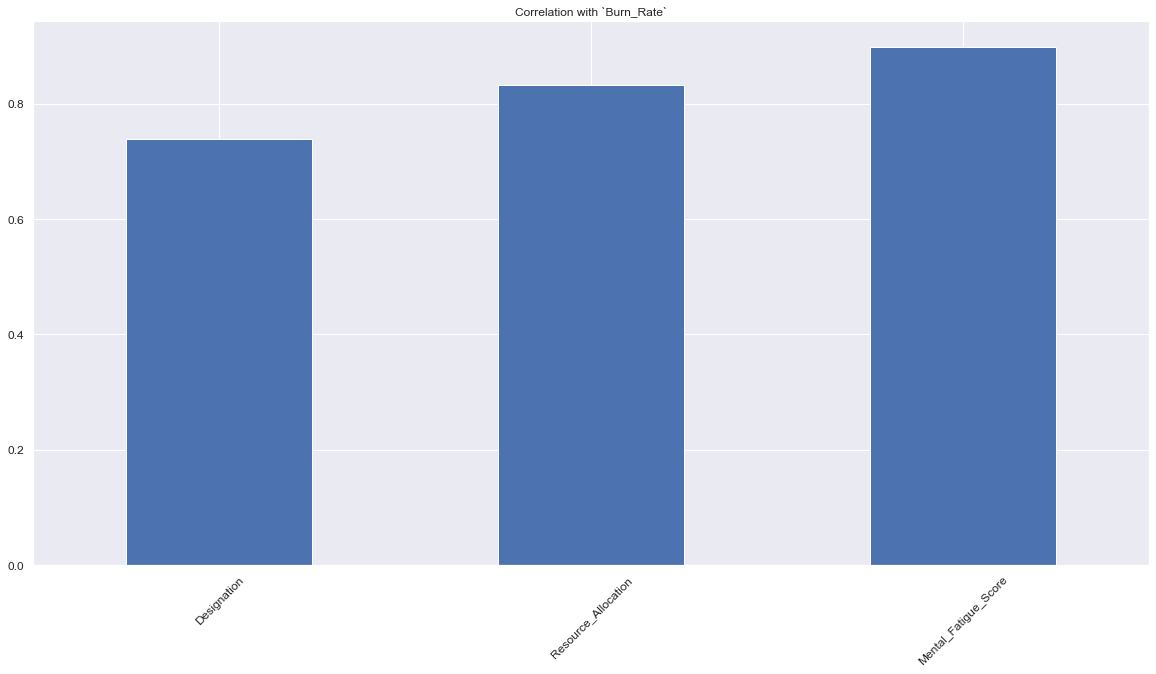

In [55]:
# Checking correlation between target variable and input variables

X_train.corrwith(y_train).sort_values().plot.bar(figsize=(20,10), title='Correlation with `Burn_Rate`', fontsize=12, rot=45, grid=True)
plt.show()

I decide that I will use these features for my model:

- Target Feature : `Burn_Rate`
- Input Feature : [`'Gender', 'Company_Type', 'WFH_Setup_Available', 'Designation', 'Resource_Allocation', 'Mental_Fatigue_Score'`]

### Feature Engineering (Scaling/Encoding)

In this part of sub-process, I will make the pipeline for data preparation process.\
This process consist of `Scaling and Encoding` input features so that it can be processed by the model.

Before start the process, I'll categorize each input variable into two different type:

Cat_nominal = [`'Gender', 'Company_Type', 'WFH_Setup_Available'`]\
Num_normal = [`'Designation', 'Resource_Allocation', 'Mental_Fatigue_Score'`]

And then, I'll do:
- `One Hot Encoding` for `Cat_nominal`
- `Standard Scaling` for `Num_normal`

In [56]:
# Column Categorization
Cat_nominal = ['Gender', 'Company_Type', 'WFH_Setup_Available']
Num_normal = ['Designation', 'Resource_Allocation', 'Mental_Fatigue_Score']

# Combines two categoy into one
final_features = Cat_nominal + Num_normal

In [57]:
# Use selected variables
X_train = X_train[final_features]
X_test = X_test[final_features]

In [58]:
# Make the Feature Engineering Pipeline
pipe_FE = ColumnTransformer([
    ('OHE', OneHotEncoder(handle_unknown='ignore'), Cat_nominal),
    ('StdScaler', StandardScaler(), Num_normal)
])  

## VI. Model Definition

### Model
Here is my initial `Burn_Rate` regression model:

- Target Feature : `Burn_Rate`
- Input Feature : [`'Gender', 'Company_Type', 'WFH_Setup_Available', 'Designation', 'Resource_Allocation', 'Mental_Fatigue_Score'`]

This is only initial model, it may change in the future depends on my model evaluation result.

### Algortihm
In this project I will use these algorithms :
- Linear Regression
- Elastic Net
- Support Vector Machine - Regression
- Decision Tree
- Random Forest

I will compare above models and choose the best one.


### Linear Regression

In [59]:
# Initial Model
lr = LinearRegression(n_jobs=-1)

# Model Pipeline
pipe_lr = Pipeline([
    ('preprocessing', pipe_FE),
    ('lr', lr)
])

# Hyper parameter
params_lr = {
    'lr__fit_intercept': [True, False],
}

### Elastic Net

In [60]:
# Initial Model
en = ElasticNet(random_state=random_state)

# Model Pipeline
pipe_en = Pipeline([
    ('preprocessing', pipe_FE),
    ('en', en)
])

# Hyper parameter
params_en = {
    'en__alpha': [1, 1.5, 2],
    'en__l1_ration': [0, 0.25, 0.5 ,0.75, 1],
    'en__fit_intercept': [True, False],
    'en__warm_start': [True, False]
}

### Support Vector Machine - Regression

In [61]:
# Initial Model
svr = SVR(cache_size=2000)

# Model Pipeline
pipe_svr = Pipeline([
    ('preprocessing', pipe_FE),
    ('svr', svr)
])

# Hyper parameter
params_svr = {
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__degree': [2, 3, 4],
    'svr__C': [0.1, 1, 10]
}

### Decision Tree Regressor

In [62]:
# Initial Model
dtr = DecisionTreeRegressor(random_state=random_state)

# Model Pipeline
pipe_dtr = Pipeline([
    ('preprocessing', pipe_FE),
    ('dtr', dtr)
])

# Hyper parameter
params_dtr = {
    'dtr__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'dtr__spliter': ['best', 'random'],
    'dtr__max_features': ['auto', 'sqrt', 'log2']
}

### Random Forest Regressor

In [63]:
# Initial Model
rfr = RandomForestRegressor(random_state=random_state, n_jobs=-1)

# Model Pipeline
pipe_rfr = Pipeline([
    ('preprocessing', pipe_FE),
    ('rfr', rfr)
])

# Hyper parameter
params_rfr = {
    'rfr__criterion': ['squared_error', 'absolute_error', 'poisson'],
    'rfr__max_features': ['auto', 'sqrt', 'log2'],
    'rfr__warm_start': [True, False]
}

### Model Evaluation (Metrics)

Since the target of this project is `Regression`, I will use these error metrics for evaluating my model:
- MAE: Mean Absolute Error
- r2 Score: r-squared score

## VII. Model Training

### Cross-Validation Process

In this part of sub-process, I will use `Cross-Validation` to evaluate my base model and find which one is the best. I will use `r2` for scoring method.

In [64]:
# Cross-validate base model

# prepare models and put it into list
models = []
models.append(('lr', pipe_lr))
models.append(('en', pipe_en))
models.append(('svr', pipe_svr))
models.append(('dtr', pipe_dtr))
models.append(('rfr', pipe_rfr))

# Create empty list to stores result
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate each model
for name, model in models:
    model.fit(X_train,y_train)
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5, n_jobs=-1)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_score':mean_score, 'stdev_score':stdev_score})

## VIII. Model Evaluation

In this part of process, I will try to evaluate the trained model and make conclusion out of it.

In [65]:
# Showing the result
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
4,rfr,0.8931,0.0022
2,svr,0.8893,0.0046
3,dtr,0.8763,0.0036
0,lr,0.8701,0.0038
1,en,-0.0005,0.0003


Based on result above, we can see the top model is `Random Forest Regressor`, it has the best `mean_score` and lowest `stdev_score`.

Despite the ranking above, In my opinion all of those models are perform similarly well (except `Elastic Net`). I decided to chose top two algorithm and tune it then compare it again.

### Hyper Parameter Tuning for the Best Model - Random Forest Regressor

In [66]:
# Hyperparameter tuning
grid_rfr = GridSearchCV(
    pipe_rfr, params_rfr, cv=5, scoring='r2', n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_rfr = grid_rfr.best_params_
best_pipe_rfr = grid_rfr.best_estimator_
df_result_rfr = pd.DataFrame.from_dict(grid_rfr.cv_results_, orient='columns')

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [67]:
# Show best parameter for Model
best_params_rfr

{'rfr__criterion': 'absolute_error',
 'rfr__max_features': 'sqrt',
 'rfr__warm_start': True}

Based on result above, the best hyper parameter settings for `Random Forest Regressor` are:
- criterion: `absolute_error`
- max_features: `sqrt`
- warm_start: `True`

### Hyper Parameter Tuning for the Best Model - Support Vector Machine - Regression

In [68]:
# Hyperparameter tuning
grid_svr = GridSearchCV(
    pipe_svr, params_svr, cv=5, scoring='r2', n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_svr = grid_svr.best_params_
best_pipe_svr = grid_svr.best_estimator_
df_result_svr = pd.DataFrame.from_dict(grid_svr.cv_results_, orient='columns')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [69]:
# Show best parameter for Model
best_params_svr

{'svr__C': 1, 'svr__degree': 2, 'svr__kernel': 'rbf'}

Based on result above, the best hyper parameter settings for `Support Vector Machine - Regressor` are:
- C: `1`
- degree: `2`
- kernel: `rbf`

### Prediction Using Best Model

In [70]:
# Prediction on `Train_Set`
y_train_pred_1 = best_pipe_rfr.predict(X_train).round(2)
y_train_pred_2 = best_pipe_svr.predict(X_train).round(2)

# Prediction on `Test_Set`
y_test_pred_1 = best_pipe_rfr.predict(X_test).round(2)
y_test_pred_2 = best_pipe_svr.predict(X_test).round(2)

### Model Evaluation - Random Forest Regressor

In [71]:
# Evaluation for training phase
print('___________________ Train Results (Random Forest Regressor) ____________________')
print('MAE:',round(mean_absolute_error(y_train,y_train_pred_1),2))
print('R-squared Score:',round(r2_score(y_train,y_train_pred_1),2))

# Evaluation for testing phase
print('___________________ Test Results (Random Forest Regressor) _____________________')
print('MAE:',round(mean_absolute_error(y_test,y_test_pred_1),2))
print('R-squared Score:',round(r2_score(y_test,y_test_pred_1),2))

# Differences
print('___________________ Differences _________________________________________________')
print('MAE:',(round(mean_absolute_error(y_test,y_test_pred_1),2) - round(mean_absolute_error(y_train,y_train_pred_1),2)).round(2))
print('R-squared Score:',(round(r2_score(y_test,y_test_pred_1),2) - round(r2_score(y_train,y_train_pred_1),2)).round(2))

___________________ Train Results (Random Forest Regressor) ____________________
MAE: 0.04
R-squared Score: 0.93
___________________ Test Results (Random Forest Regressor) _____________________
MAE: 0.05
R-squared Score: 0.9
___________________ Differences _________________________________________________
MAE: 0.01
R-squared Score: -0.03


### Model Evaluation - Support Vector Machine - Regression

In [72]:
# Evaluation for training phase
print('___________________ Test Results (Support Vector Regression) _____________________')
print('MAE:',round(mean_absolute_error(y_train,y_train_pred_2),2))
print('R-squared Score:',round(r2_score(y_train,y_train_pred_2),2))

# Evaluation for testing phase
print('___________________ Test Results (Support Vector Regression) _____________________')
print('MAE:',round(mean_absolute_error(y_test,y_test_pred_2),2))
print('R-squared Score:',round(r2_score(y_test,y_test_pred_2),2))

# Differences
print('___________________ Differences _________________________________________________')
print('MAE:',(round(mean_absolute_error(y_test,y_test_pred_2),2) - round(mean_absolute_error(y_train,y_train_pred_2),2)).round(2))
print('R-squared Score:',(round(r2_score(y_test,y_test_pred_2),2) - round(r2_score(y_train,y_train_pred_2),2)).round(2))

___________________ Test Results (Support Vector Regression) _____________________
MAE: 0.05
R-squared Score: 0.89
___________________ Test Results (Support Vector Regression) _____________________
MAE: 0.05
R-squared Score: 0.89
___________________ Differences _________________________________________________
MAE: 0.0
R-squared Score: 0.0


### Model Evaluation Final Conclusion

Here are my conclusion for model evaluation process:

- Both model shows pretty good performance.
- `Random Forest Regressor` shows lower `MAE Score` and higher `r squared score`, but has 3% differences between `training and testing phase`. This mean `Random Forest Regressor` show slight `overfit` nature.
- `Support Vector Machine - Regression` shows similar `MAE Score` and lower `r squared score`, but has 0% differences between `training and testing phase`. This mean `Support Vector Machine - Regression` show `goodfit` nature.
- Regardless of the model's fit nature, both model has high `r squared score`. This mean the dataset fits pretty well with the model.

Since `Support Vector Machine - Regression` show `goodfit` nature, I decided to use it as my final model.

### Save the Chosen Model

In this part of sub-process, I will save the chosen model so that it can be deployed to the production environment.

In [73]:
# Save the best model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_pipe_svr, f)

## IX. Model Inference
In this part of process, I will try to feed the machine learning model using the `Inference Set` and see how it perform.

Before feeding the set into the model, We need to do exact same process of `Missing value handling, Feature selection and engineering` process to the `Inference Set`

In [74]:
# Missing Value Check
inf_set.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

Looks like there is no missing value here, let's continue the process.

In [75]:
# Renaming Columns
for i in inf_set.columns:
    inf_set.rename(columns={i:i.replace(' ','_')}, inplace=True)

### Prediction

In [80]:
# Determines prediction result
y_inf_pred = best_pipe_svr.predict(inf_set).round(2)

In [81]:
# Show Result
y_inf_pred

array([0.64, 0.32, 0.43, ..., 0.9 , 0.57, 0.15])

## X. Conclusion

Here all the conclusion that I get from this project

## EDA Analysis

**Univariate Analysis**

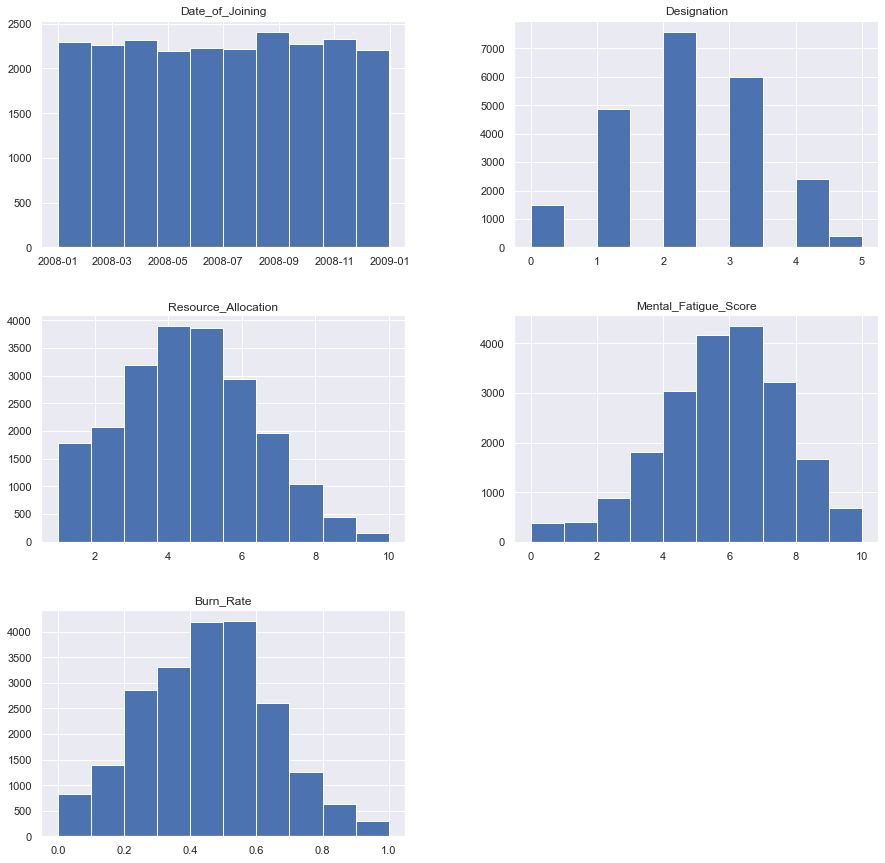

In [82]:
# Histogram Plot
df.hist()
plt.gcf().set_size_inches(15, 15)
plt.show()

From the graph above, We can see that:
- `Designation and Burn Rate` follow `normal distribution.`
- `Resource Allocation and Mental Fatigue Score` follow slight `skew distribution.`

**Bivariate Analysis**

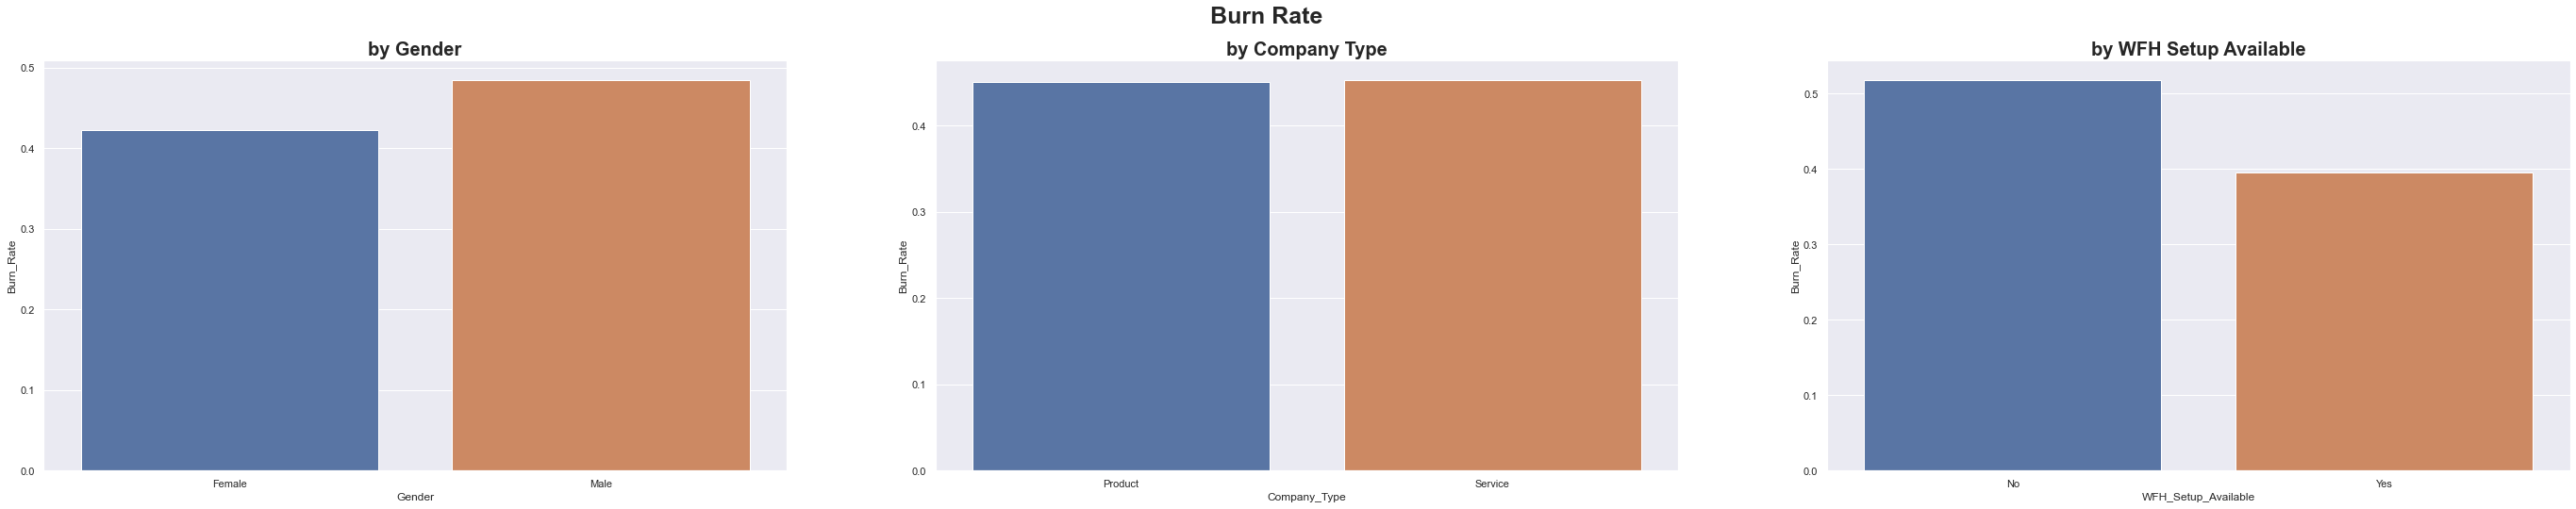

In [83]:
# Categorical Bivariate Analysis
fig, ax = plt.subplots(1,3, figsize=(24 * 2, 8))
fig.suptitle('Burn Rate', fontsize=25, weight='bold')

graph1 = pd.DataFrame(df.groupby('Gender')['Burn_Rate'].mean()).reset_index()
sns.barplot(data=graph1, x='Gender', y='Burn_Rate', ax=ax[0])
ax[0].set_title('by Gender', weight='bold', fontsize=20)

graph2 = pd.DataFrame(df.groupby('Company_Type')['Burn_Rate'].mean()).reset_index()
sns.barplot(data=graph2, x='Company_Type', y='Burn_Rate', ax=ax[1])
ax[1].set_title('by Company Type', weight='bold', fontsize=20)

graph3 = pd.DataFrame(df.groupby('WFH_Setup_Available')['Burn_Rate'].mean()).reset_index()
sns.barplot(data=graph3, x='WFH_Setup_Available', y='Burn_Rate', ax=ax[2])
ax[2].set_title('by WFH Setup Available', weight='bold', fontsize=20)

plt.show()

Based from graph above, We can see that:
- `By Gender` : Male tends to has higher `Burn Rate` compared to Female
- `By Company Type` : Both `Product and Service` industry has equal `Burn Rate`
- `By WFH Setup Available` : People that has no option for working from home has higher `Burn Rate` compared to people that has opt to work from home.

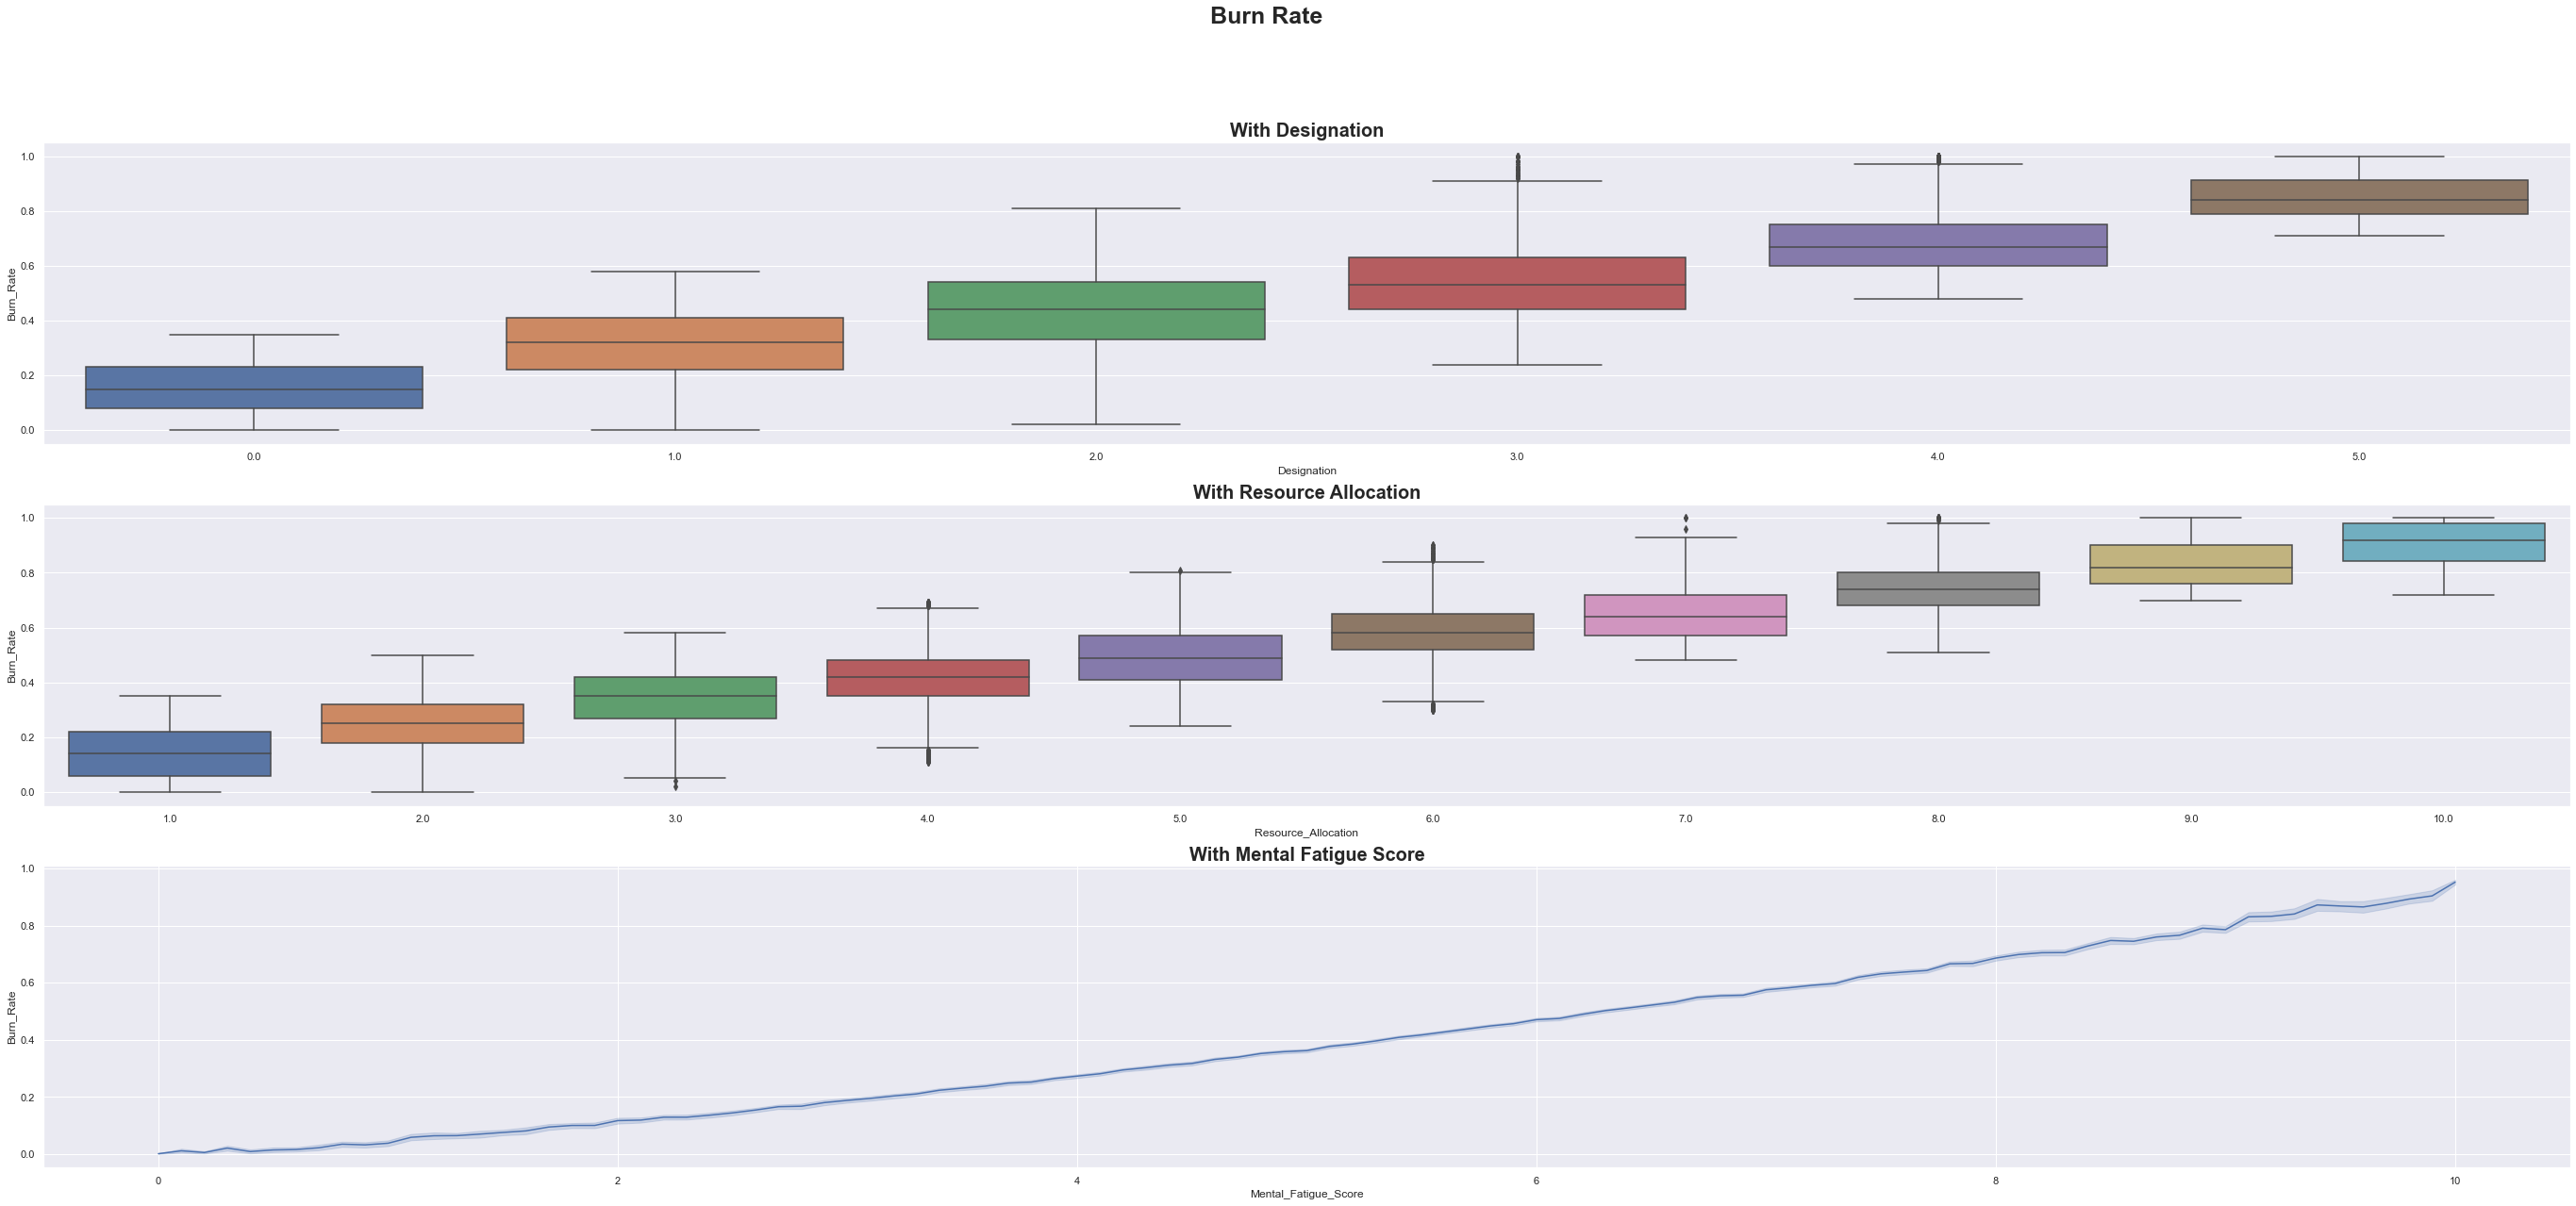

In [84]:
# Numerical Bivariate Analysis
fig, ax = plt.subplots(3,1, figsize=(24 * 2, 20))
fig.suptitle('Burn Rate', fontsize=25, weight='bold')

sns.boxplot(data=df, x='Designation', y='Burn_Rate', ax=ax[0])
ax[0].set_title('With Designation', weight='bold', fontsize=20)

sns.boxplot(data=df, x='Resource_Allocation', y='Burn_Rate', ax=ax[1])
ax[1].set_title('With Resource Allocation', weight='bold', fontsize=20)

sns.lineplot(data=df, x='Mental_Fatigue_Score', y='Burn_Rate', ax=ax[2])
ax[2].set_title('With Mental Fatigue Score', weight='bold', fontsize=20)

plt.show()

Based from graph above, We can see that:
- `With Designation` : As `Designation` increase, `Burn Rate` also tends to increase.
- `With Resource Allocation` : As `Resource Allocation` increase, `Burn Rate` also tends to increase.
- `Mental Fatigue Designation` : As `Mental Fatigue` increase, `Burn Rate` also tends to increase.

**Multivariate Analysis**

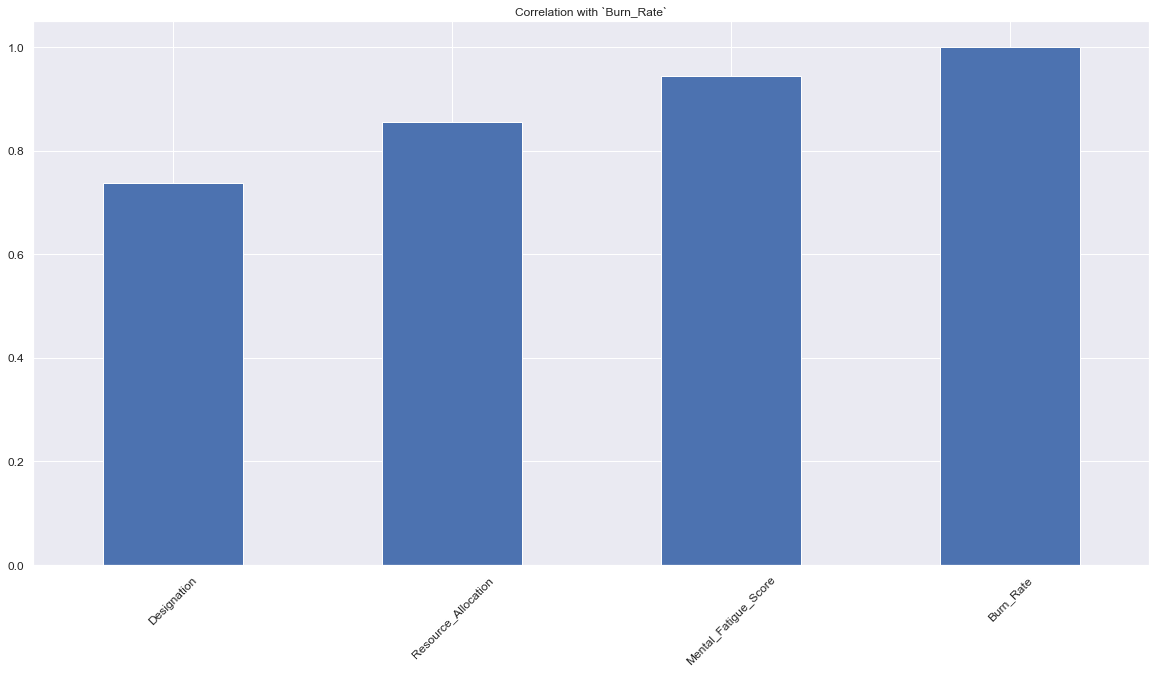

In [85]:
# Checking correlation between target variable and input variables

df.corrwith(df['Burn_Rate']).sort_values().plot.bar(figsize=(20,10), title='Correlation with `Burn_Rate`', fontsize=12, rot=45, grid=True)
plt.show()

Based on graph above, I can say that all features has high positive correlation with `Burn_Rate.`

Also from the correaltion above, I can validate the pattern found on `bivaraite analysis` in the previous process.

## Model Analysis

**Model-Algortihm**

In this project I will use these algorithms :
- Linear Regression
- Elastic Net
- Support Vector Machine - Regression
- Decision Tree
- Random Forest

**Model Evaluation**

I will use these error metrics for evaluating my model:
- MAE: Mean Absolute Error
- r2 Score: r-squared score

**Cross Validation Result**

In [86]:
# Showing the result
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
4,rfr,0.8931,0.0022
2,svr,0.8893,0.0046
3,dtr,0.8763,0.0036
0,lr,0.8701,0.0038
1,en,-0.0005,0.0003


Based on result above, we can see the top model is `Random Forest Regressor`, it has the best `mean_score` and lowest `stdev_score`.\
I decided to chose top two algorithm and tune it then compare it again.

**Hyper Parameter Tuning Results**


The best hyper parameter setting for `Random Forest Regressor` are:
- criterion: `absolute_error`
- max_features: `sqrt`
- warm_start: `True`

The best hyper parameter setting for `Support Vector Machine - Regressor` are:
- C: `1`
- degree: `2`
- kernel: `rbf`

**Performance Summary**

**Random Forest Regressor**

In [87]:
# Evaluation for training phase
print('___________________ Train Results (Random Forest Regressor) ____________________')
print('MAE:',round(mean_absolute_error(y_train,y_train_pred_1),2))
print('R-squared Score:',round(r2_score(y_train,y_train_pred_1),2))

# Evaluation for testing phase
print('___________________ Test Results (Random Forest Regressor) _____________________')
print('MAE:',round(mean_absolute_error(y_test,y_test_pred_1),2))
print('R-squared Score:',round(r2_score(y_test,y_test_pred_1),2))

# Differences
print('___________________ Differences _________________________________________________')
print('MAE:',(round(mean_absolute_error(y_test,y_test_pred_1),2) - round(mean_absolute_error(y_train,y_train_pred_1),2)).round(2))
print('R-squared Score:',(round(r2_score(y_test,y_test_pred_1),2) - round(r2_score(y_train,y_train_pred_1),2)).round(2))

___________________ Train Results (Random Forest Regressor) ____________________
MAE: 0.04
R-squared Score: 0.93
___________________ Test Results (Random Forest Regressor) _____________________
MAE: 0.05
R-squared Score: 0.9
___________________ Differences _________________________________________________
MAE: 0.01
R-squared Score: -0.03


**Support Vector Machine - Regression**

In [88]:
# Evaluation for training phase
print('___________________ Test Results (Support Vector Regression) _____________________')
print('MAE:',round(mean_absolute_error(y_train,y_train_pred_2),2))
print('R-squared Score:',round(r2_score(y_train,y_train_pred_2),2))

# Evaluation for testing phase
print('___________________ Test Results (Support Vector Regression) _____________________')
print('MAE:',round(mean_absolute_error(y_test,y_test_pred_2),2))
print('R-squared Score:',round(r2_score(y_test,y_test_pred_2),2))

# Differences
print('___________________ Differences _________________________________________________')
print('MAE:',(round(mean_absolute_error(y_test,y_test_pred_2),2) - round(mean_absolute_error(y_train,y_train_pred_2),2)).round(2))
print('R-squared Score:',(round(r2_score(y_test,y_test_pred_2),2) - round(r2_score(y_train,y_train_pred_2),2)).round(2))

___________________ Test Results (Support Vector Regression) _____________________
MAE: 0.05
R-squared Score: 0.89
___________________ Test Results (Support Vector Regression) _____________________
MAE: 0.05
R-squared Score: 0.89
___________________ Differences _________________________________________________
MAE: 0.0
R-squared Score: 0.0


**Model Analysis Conclusion**

- Both model shows pretty good performance.
- `Random Forest Regressor` shows lower `MAE Score` and higher `r squared score`, but has 3% differences between `training and testing phase`. This mean `Random Forest Regressor` show slight `overfit` nature.
- `Support Vector Machine - Regression` shows similar `MAE Score` and lower `r squared score`, but has 0% differences between `training and testing phase`. This mean `Support Vector Machine - Regression` show `goodfit` nature.
- Regardless of the model's fit nature, both model has high `r squared score`. This mean the dataset fits pretty well with the model.

Since `Support Vector Machine - Regression` show `goodfit` nature, I decided to use it as my final model.

## XI. Room for Improvement

In the beginning of the project, I have stated the `dataset limitation and assumptions` for the project. I think those two heavily influence the prediction model's nature in estimating the `Burn Rate` value. For further improvement of the model's accuracy, I can advised to:

> - Collect more records from more employee across different `Date of Joining`
> - Add more detailed workfield information (e.g. 'office worker', 'healthcare worker', 'retail worker', etc.) besides `Company Type`
> - Add more physical and health related information of each employee (e.g. 'age', 'marital status', etc.)

I'll save this work for later time or for whomever have same interest for this project.